### Importing libraries here

In [205]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re
from PIL import Image
import folium
from folium import plugins
%matplotlib inline

Student Performance - Traditional Visualisation

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
for col in df.columns.tolist():
    print(col, end= ': ')
    print('isna : ' + str(df[col].isna().sum()), end = '\n' )
    print(df[col].value_counts(), end='\n----------------\n')

gender: isna : 0
female    518
male      482
Name: gender, dtype: int64
----------------
race/ethnicity: isna : 0
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
----------------
parental level of education: isna : 0
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
----------------
lunch: isna : 0
standard        645
free/reduced    355
Name: lunch, dtype: int64
----------------
test preparation course: isna : 0
none         642
completed    358
Name: test preparation course, dtype: int64
----------------
math score: isna : 0
65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: math score, Length: 81, dtype: int64
----------------
reading score: isna : 0
72    34
74    33
64    32
73    30
67    30
      ..
32     1
28   

In [4]:
mpl.style.use(['seaborn-muted'])

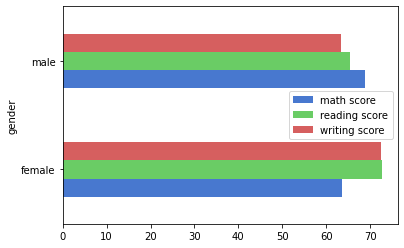

In [5]:
sex = df.groupby('gender').mean()
sex.plot(kind = 'barh')
plt.legend(loc='best')
plt.show()

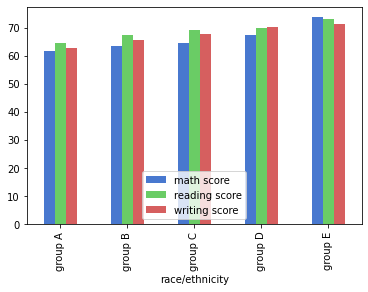

In [6]:
race = df.groupby('race/ethnicity').mean()
race.plot(kind='bar')
plt.show()

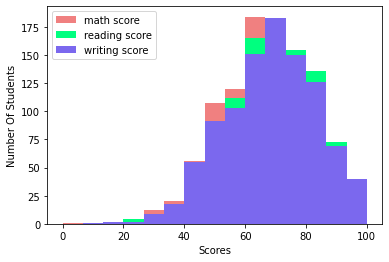

In [7]:
df.plot(kind='hist',color=['lightcoral','springgreen','mediumslateblue'],bins = 15)
plt.ylabel('Number Of Students')
plt.xlabel('Scores')
plt.show()

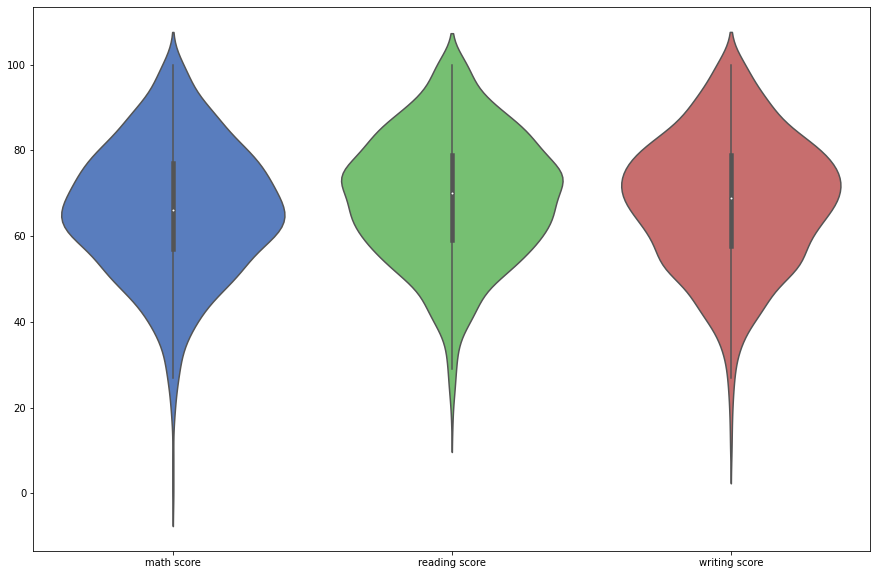

In [8]:
plt.figure(figsize=(15,10))
sns.violinplot(data=df)
plt.show()

UFO Sightings - GeoSpatial Analysis

In [166]:
ufo = pd.read_csv('UFOs/scrubbed.csv')
ufo.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


When I saw the data, I noticed that the datatypes were mixed. First cleaning is to handle duration (seconds). The column contains int, numeric str, non-numeric str, floats and floats in string format. 

In [167]:
def notfloat(x):
    try:
        float(x)
    except:
        return True
    return False
temp = (ufo[ufo['duration (seconds)'].apply(lambda x: isinstance(x, str) and not x.isnumeric() and notfloat(x))])
temp

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
27822,2/2/2000 19:33,bouse,az,us,NaN,2`,each a few seconds,Driving through Plomosa Pass towards Bouse Loo...,2/16/2000,33.9325000,-114.005000
35692,4/10/2005 22:52,santa cruz,ca,us,NaN,8`,eight seconds,2 red lights moving together and apart with a ...,4/16/2005,36.9741667,-122.029722
58591,7/21/2006 13:00,ibague (colombia),NaN,NaN,circle,0.5`,1/2 segundo,Viajaba a 27.000 pies en un avion comercial ve...,10/30/2006,4.440663,-75.244141


In [168]:
for x in temp.index:
    ufo.loc[x,'duration (seconds)']= ufo.loc[x,'duration (seconds)'].replace('`','')
    print(ufo.loc[x,'duration (seconds)'])

2
8
0.5


In [169]:
#ufo['duration (seconds)'].astype(str)
ufo['duration (seconds)'] = ufo['duration (seconds)'].astype(float)

Dropping rows I won't be working with for the visualization

In [170]:
ufo.drop(['city','state','country','duration (hours/min)','date posted'],axis=1,inplace=True)

I might work with shapes later so I need to get an idea on their data

In [171]:
ufo['shape'].value_counts()

light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
crescent         2
round            2
dome             1
changed          1
hexagon          1
flare            1
pyramid          1
Name: shape, dtype: int64

In [172]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            80332 non-null  object 
 1   shape               78400 non-null  object 
 2   duration (seconds)  80332 non-null  float64
 3   comments            80317 non-null  object 
 4   latitude            80332 non-null  object 
 5   longitude           80332 non-null  float64
dtypes: float64(2), object(4)
memory usage: 3.7+ MB


To do list:

Fill NA values for shape with 'unknown'

Fill NA values for comments with 'No comments'

Convert 'latitude' values to float64 - see whats' wrong with the data

In [173]:
ufo['shape'] = ufo['shape'].fillna('unknown')
ufo['comments'] = ufo['comments'].fillna('No comments')

In [174]:
temp2 = (ufo[ufo['latitude'].apply(lambda x: isinstance(x, str) and not x.isnumeric() and notfloat(x))])
temp2

,datetime,shape,duration (seconds),comments,latitude,longitude
43782,5/22/1974 05:30,rectangle,180.0,Huge rectangular object emmitting intense whit...,33q.200088,-105.624152


In [175]:
ufo.loc[temp2.index[0],'latitude'] = '33.200088'
ufo['latitude'] = ufo['latitude'].astype(float)

In [213]:
ufo.columns

Index(['datetime', 'shape', 'duration (seconds)', 'comments', 'latitude',
       'longitude '],
      dtype='object')

In [207]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            80332 non-null  object 
 1   shape               80332 non-null  object 
 2   duration (seconds)  80332 non-null  float64
 3   comments            80332 non-null  object 
 4   latitude            80332 non-null  float64
 5   longitude           80332 non-null  float64
dtypes: float64(3), object(3)
memory usage: 3.7+ MB


In [227]:
aliens = folium.Map(min_zoom=2, tiles='Stamen Watercolor')
aliens

In [263]:
aliens = folium.Map(min_zoom=2, tiles='OpenStreetMap')
#sightings = plugins.MarkerCluster().add_to(aliens)
for lat, long, comment in zip(x.latitude,x['longitude '],x['shape']):
    folium.CircleMarker(
        [lat,long],
        radius = 5,
        color = 'yellow',
        fill_color= 'blue',
        fill_opacity = 0.6,
        fill=True,
        popup=comment,
    ).add_to(aliens)
aliens

In [255]:
x=ufo.sample(100)

In [266]:
ufo['shape'].value_counts()

light        16565
triangle      7865
circle        7608
unknown       7516
fireball      6208
other         5649
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
crescent         2
round            2
dome             1
changed          1
hexagon          1
flare            1
pyramid          1
Name: shape, dtype: int64

WordCloud - Religious Texts

In [12]:
quran = open('Sacred Texts/quran.txt',encoding="utf8").read()

In [13]:
stopword = set(STOPWORDS)

In [14]:
quran_wc = WordCloud(max_words=200000,stopwords=stopword)

In [15]:
quran_wc.generate(quran)

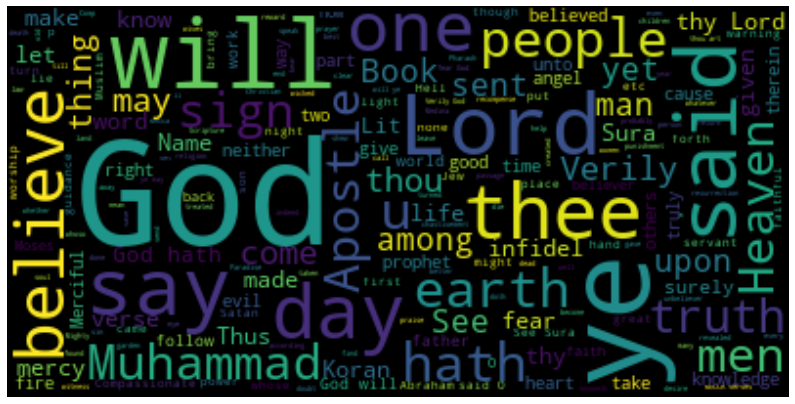

In [17]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18) 
plt.imshow(quran_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
stopword.add('say')
stopword.add('said')
stopword.add('may')


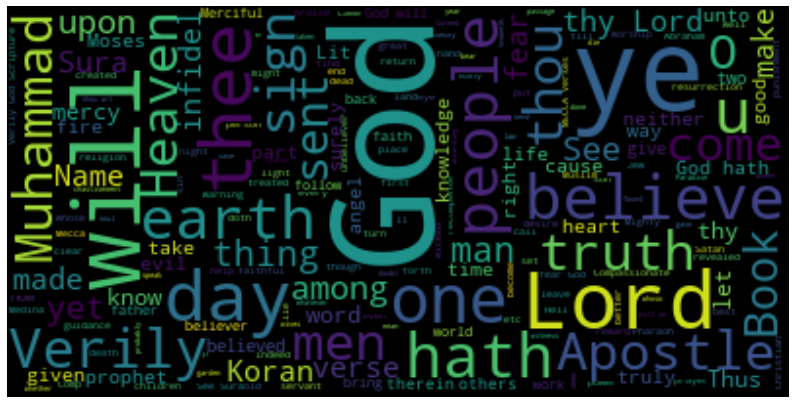

In [19]:
quran_wc = WordCloud(max_words=200000,stopwords=stopword)
quran_wc.generate(quran)
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18) 
plt.imshow(quran_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

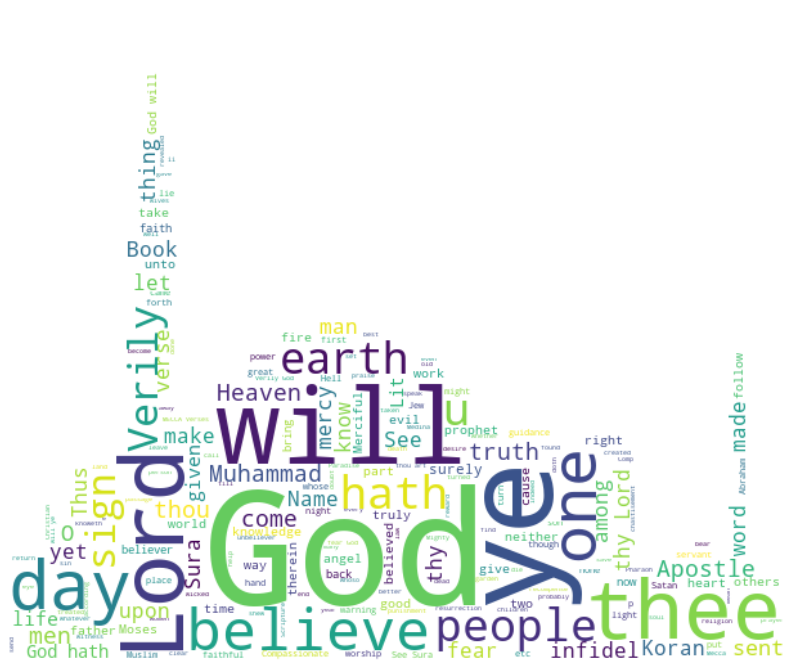

In [28]:
quran_mask = np.array(Image.open('Sacred Texts/mosque.png'))
quran_wc = WordCloud(background_color='white',max_words=20000,stopwords=stopword,mask=quran_mask)
quran_wc.generate(quran)
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18) 
plt.imshow(quran_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

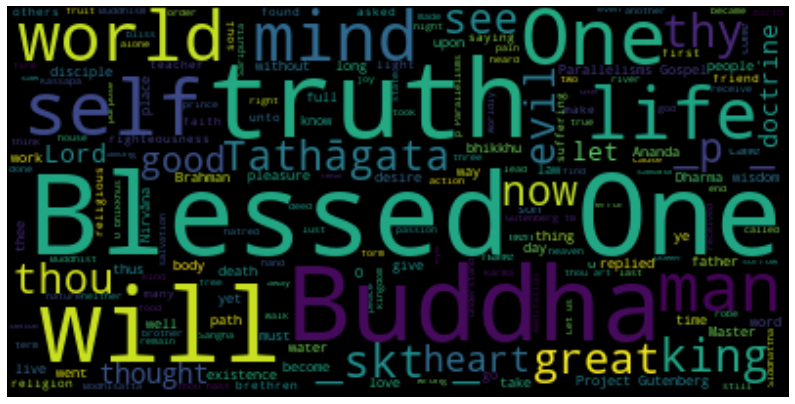

In [31]:
buddha = open('Sacred Texts/buddha.txt',encoding="utf8").read()
#stopword = set(STOPWORDS)
buddha_wc = WordCloud(max_words=200000,stopwords=stopword)
buddha_wc.generate(buddha)
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18) 
plt.imshow(buddha_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

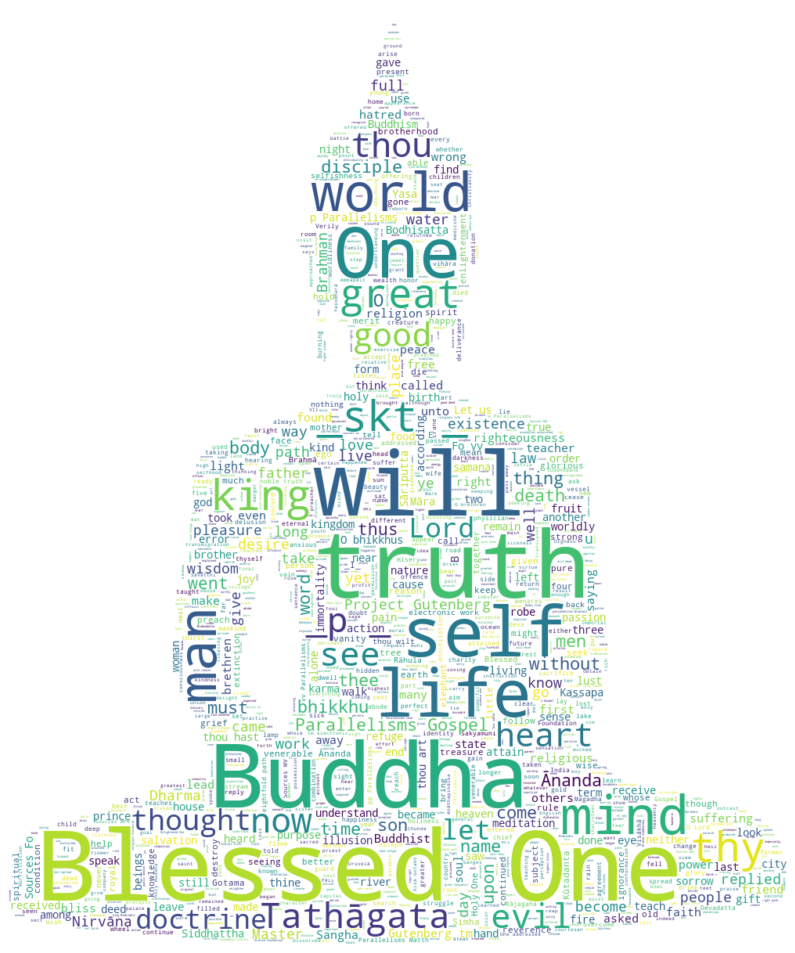

In [32]:
buddha_mask = np.array(Image.open('Sacred Texts/buddha.png'))
buddha_wc = WordCloud(background_color='white',max_words=20000,stopwords=stopword,mask=buddha_mask)
buddha_wc.generate(buddha)
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18) 
plt.imshow(buddha_wc, interpolation='bilinear')
plt.axis('off')
plt.show()